In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import unicodedata
import scipy.stats as stat

In [2]:
DataHelium = pd.read_csv("HeliumSpectra.txt", sep = "\t", header = None)
Wavelength_He = np.array(DataHelium[0])
Intensity_He = np.array(DataHelium[1])
N_He = len(Wavelength_He)
SigmaIntensity_He = [np.sqrt(N_He)]*N_He

/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


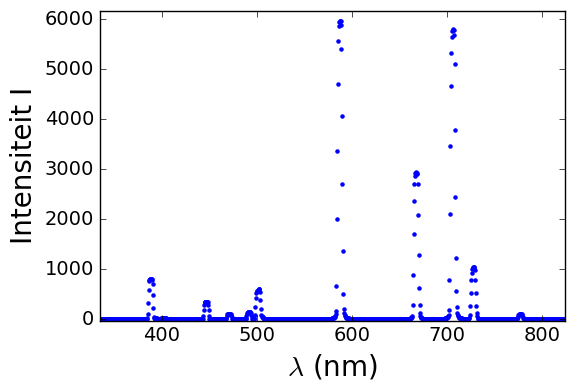

In [3]:
FigVi = plt.figure()
#plt.errorbar(Wavelength_He, Intensity_He, SigmaIntensity_He, label = 'I($\lambda$)', fmt = '.')
plt.scatter(Wavelength_He, Intensity_He, marker = '.', color = 'blue')
plt.ylabel('Intensiteit I', size=20)
plt.xlabel('$\lambda$ (nm)', size=20)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title("Helium Spectrum")
plt.axis([Wavelength_He.min()-1, Wavelength_He.max()+1, Intensity_He.min()-20, Intensity_He.max()+200])
#FigVi.savefig('HeliumSpectrum.png', dpi=400, bbox_inches='tight')
plt.show()

In [4]:
#grootste piek : 520 - 550
# eerste piek : 50 - 100
print(Wavelength_He[89])

print(Wavelength_He[145])

377.102
402.955


In [5]:
i1 = 90 #95
i2 = 135 #130
x = Wavelength_He[i1:i2] * 10 ** -6
y = Intensity_He[i1:i2]
s = SigmaIntensity_He[i1:i2]
I0 = y[ np.argmax(y) ]
print(I0)
L0 = x[ np.argmax(y) ]
print(L0)
def Lorentz(x,a,g,u):
    return a*g/((x - u)**2+g**2)

w = 0.000005


x0 = [800*w/2 ,w/2,L0]
print(L0)
def chi2(x,y,param,s):
    diff = y - Lorentz(x,param[0],param[1],param[2])
    return np.sum((diff/s)**2)
    
chi2ftie = lambda param: chi2(x, y, param, s)

result = opt.minimize(chi2ftie,x0)
a,g,u = result.x
print(a,g,u)
print(a/g)

805.18
0.000388629
0.000388629
0.0017872474687602143 1.8704297927380427e-06 0.0003885234159462972
955.5276951314696


In [6]:
f = lambda A: chi2(x, y, [A,g,u], s) - chi2(x, y, [a,g,u], s) - 1
A1 = opt.fsolve(f,0)[0]
A2 = opt.fsolve(f,0.5)[0]
sA1 = a-A1
sA2 = A2-a
print(A1,a,A2)
print(sA1,sA2)
print(sA1/a,sA2/a)
print("-----")

f = lambda G: chi2(x, y, [a,G,u], s) - chi2(x, y, [a,g,u], s) - 1
G1 = opt.fsolve(f,1*10**-6)[0]
G2 = opt.fsolve(f,6*10**-6)[0]
sG1 = g-G1
sG2 = G2-g
print(G1,g,G2)
print(sG1,sG2)
print(sG1/g,sG2/g)
print("-----")

f = lambda U: chi2(x, y, [a,g,U], s) - chi2(x, y, [a,g,u], s) - 1
U1 = opt.fsolve(f,0.000388)[0]
U2 = opt.fsolve(f,0.000389)[0]
sU1 = u-U1
sU2 = U2-u
print(U1,u,U2)
print(sU1,sU2)
print(sU1/u,sU2/u)

0.0017639170318311996 0.0017872474687602143 0.0018114306342521664
2.333043692901468e-05 2.418316549195206e-05
0.013053836884266866 0.013530955234043523
-----
1.8454236653719924e-06 1.8704297927380427e-06 1.909950524575758e-06
2.5006127366050228e-08 3.95207318377153e-08
0.013369187907045055 0.021129224946669918
-----
0.0003884891842865041 0.0003885234159462972 0.0003885724908553049
3.42316597931212e-08 4.9074909007720303e-08
8.810706996834599e-05 0.00012631132897921287


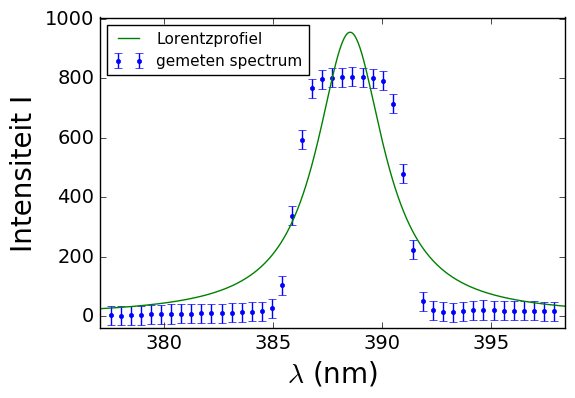

In [7]:
SmoothX = np.linspace(x.min()-0.0000005, x.max()+0.0000005, 500)

FigVi = plt.figure()
plt.errorbar(x, y, s, label = 'gemeten spectrum', fmt = '.')
plt.plot(SmoothX,Lorentz(SmoothX,a,g,u), label = "Lorentzprofiel")
plt.ylabel('Intensiteit I', size=20)
plt.xlabel('$\lambda$ (nm)', size=20)
plt.legend(fontsize=11, bbox_to_anchor=(0.465, 1))
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title("Helium Spectrum: er is een duidelijke fundamentele limiet voor de breedte")
plt.axis([x.min()-0.0000005, x.max()+0.0000005, y.min()-40, y.max()+200])
plt.xticks([0.00038, 0.000385, 0.000390, 0.000395], [380, 385, 390, 395])
#FigVi.savefig('LorentzProfiel.png', dpi=400, bbox_inches='tight')
plt.show()

In [8]:
v = len(x) - len([a,g,u])
pwaarde = 1 - stat.chi2.cdf(chi2ftie([a,g,u]), v)
print(str(pwaarde*100)+"%")

0.0%


In [9]:
DataX = pd.read_csv("XSpectra.txt", sep = "\t", header = None)
Wavelength_X = np.array(DataX[0])
Intensity_X = np.array(DataX[1])
N_X = len(Wavelength_X)
SigmaIntensity_X = [np.sqrt(N_X)]*N_X

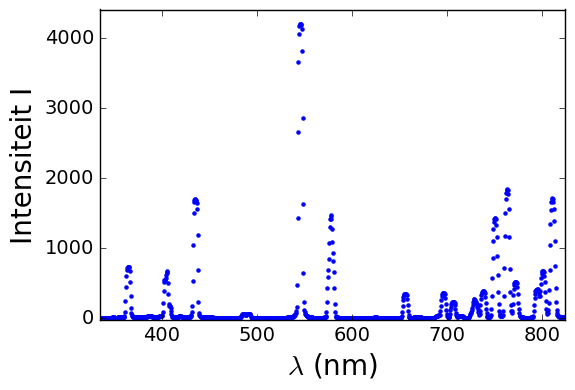

In [10]:
FigVi = plt.figure()
#plt.errorbar(Wavelength_X, Intensity_X, SigmaIntensity_X, label = 'I($\lambda$)', fmt = '.')
plt.scatter(Wavelength_X, Intensity_X, color= 'b', marker = '.')
plt.ylabel('Intensiteit I', size=20)
plt.xlabel('$\lambda$ (nm)', size=20)
#plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.axis([Wavelength_X.min()-1, Wavelength_X.max()+1, Intensity_X.min()-20, Intensity_X.max()+200])
#FigVi.savefig('OnbekendSpectrum.png', dpi=400, bbox_inches='tight')
plt.show()

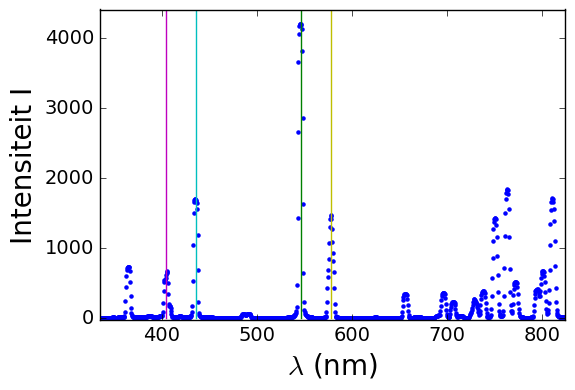

In [11]:
FigVi = plt.figure()
#plt.errorbar(Wavelength_X, Intensity_X, SigmaIntensity_X, label = 'I($\lambda$)', fmt = '.')
plt.scatter(Wavelength_X, Intensity_X, color= 'b', marker = '.')
plt.ylabel('Intensiteit I', size=20)
plt.xlabel('$\lambda$ (nm)', size=20)
#plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title("Onbekend Spectrum")
plt.axis([Wavelength_X.min()-1, Wavelength_X.max()+1, Intensity_X.min()-20, Intensity_X.max()+200])

y = np.linspace(Intensity_X.min(), Intensity_X.max()+200,500)
x = [404.7] * 500
plt.plot(x,y, "m")
x = [435.8] * 500
plt.plot(x,y, "c")
x = [546.1] * 500
plt.plot(x,y, "g")
x = [578.2] * 500
plt.plot(x,y, "y")

x = [420.8] * 500
#plt.plot(x,y, "m--")
x = [471.2] * 500
#plt.plot(x,y, "c--")
x = [443.8] * 500
#plt.plot(x,y, "r--")

x = [546.6] * 500
#plt.plot(x,y, "g--")
x = [601.6] * 500
#plt.plot(x,y, "y--")

#FigVi.savefig('kwik.png', dpi=400, bbox_inches='tight')

plt.show()

In [12]:
DataV = pd.read_csv("KamerVerlichting.txt", sep = "\t", header = None)
Wavelength_V = np.array(DataV[0])
Intensity_V = np.array(DataV[1])
N_V = len(Wavelength_V)
SigmaIntensity_V = [np.sqrt(N_V)]*N_V

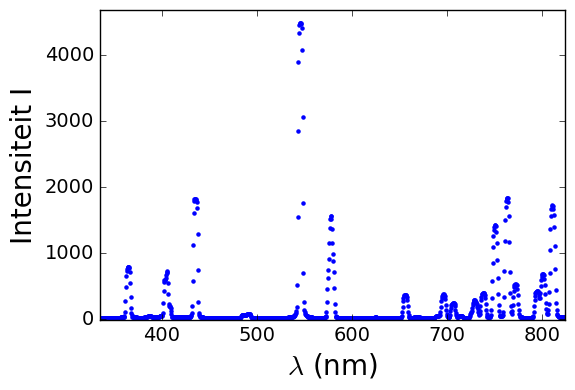

In [13]:
FigVi = plt.figure()
#plt.errorbar(Wavelength_V, Intensity_V, SigmaIntensity_V, label = 'I($\lambda$)', fmt = '.')
plt.scatter(Wavelength_V, Intensity_V, color= 'b', marker = '.')
plt.ylabel('Intensiteit I', size=20)
plt.xlabel('$\lambda$ (nm)', size=20)
#plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title("Kamerverlichting: Hg lijkt aanwezig te zjn")
plt.axis([Wavelength_V.min()-1, Wavelength_V.max()+1, Intensity_V.min()-20, Intensity_V.max()+200])
#FigVi.savefig('Kamerverlichting.png', dpi=400, bbox_inches='tight')
plt.show()

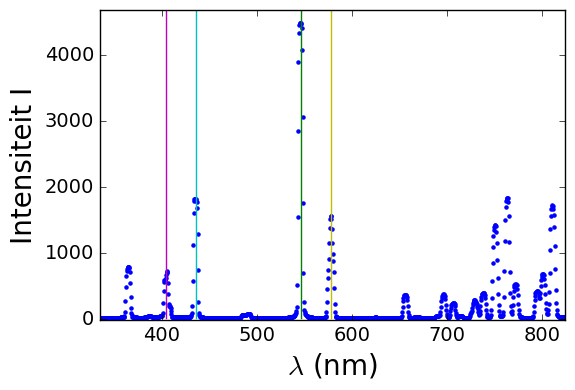

In [14]:
FigVi = plt.figure()
#plt.errorbar(Wavelength_V, Intensity_V, SigmaIntensity_V, label = 'I($\lambda$)', fmt = '.')
plt.scatter(Wavelength_V, Intensity_V, color= 'b', marker = '.')
plt.ylabel('Intensiteit I', size=20)
plt.xlabel('$\lambda$ (nm)', size=20)
#plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title("Kamerverlichting: Hg lijkt aanwezig te zjn")
plt.axis([Wavelength_V.min()-1, Wavelength_V.max()+1, Intensity_V.min()-20, Intensity_V.max()+200])

y = np.linspace(Intensity_V.min(), Intensity_V.max()+200,500)
x = [404.7] * 500
plt.plot(x,y, "m")
x = [435.8] * 500
plt.plot(x,y, "c")
x = [546.1] * 500
plt.plot(x,y, "g")
x = [578.2] * 500
plt.plot(x,y, "y")

#FigVi.savefig('KamerverlichtingHg.png', dpi=400, bbox_inches='tight')

plt.show()

In [15]:
#BLAUW
DataBlauw = pd.read_csv("blauwMeting.txt", sep = "\t", header = None)
Wavelength_B_1 = np.array(DataBlauw[2])
Absorption_B_1 = np.array(DataBlauw[3])
Wavelength_B_2 = np.array(DataBlauw[4])
Absorption_B_2 = np.array(DataBlauw[5])
Wavelength_B_5 = np.array(DataBlauw[6])
Absorption_B_5 = np.array(DataBlauw[7])
Wavelength_B_3 = np.array(DataBlauw[8])
Absorption_B_3 = np.array(DataBlauw[9])
Wavelength_B_4 = np.array(DataBlauw[10])
Absorption_B_4 = np.array(DataBlauw[11])
N_B = len(Wavelength_B_1)
SigmaAbsorptionB = [0.02]*N_B

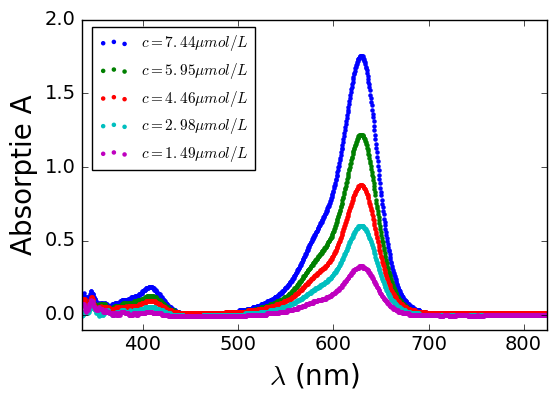

In [16]:
FigVi = plt.figure()
#plt.errorbar(Wavelength_B_1, Absorption_B_1, SigmaAbsorptionB, label = 'A($\lambda$)', fmt = '.')
#plt.errorbar(Wavelength_B_2, Absorption_B_2, SigmaAbsorptionB, label = 'A($\lambda$)', fmt = '.')
#plt.errorbar(Wavelength_B_3, Absorption_B_3, SigmaAbsorptionB, label = 'A($\lambda$)', fmt = '.')
#plt.errorbar(Wavelength_B_4, Absorption_B_4, SigmaAbsorptionB, label = 'A($\lambda$)', fmt = '.')
#plt.errorbar(Wavelength_B_5, Absorption_B_5, SigmaAbsorptionB, label = 'A($\lambda$)', fmt = '.')

plt.scatter(Wavelength_B_1, Absorption_B_1, label = '$c = 7.44 \mu mol/L$', marker = '.', color = "b")
plt.scatter(Wavelength_B_2, Absorption_B_2, label = '$c = 5.95 \mu mol/L$', marker = '.', color = "g")
plt.scatter(Wavelength_B_3, Absorption_B_3, label = '$c = 4.46 \mu mol/L$', marker = '.', color = "r")
plt.scatter(Wavelength_B_4, Absorption_B_4, label = '$c = 2.98 \mu mol/L$', marker = '.', color = "c")
plt.scatter(Wavelength_B_5, Absorption_B_5, label = '$c = 1.49 \mu mol/L$', marker = '.', color = "m")

plt.ylabel('Absorptie A', size=20)
plt.xlabel('$\lambda$ (nm)', size=20)
plt.legend(bbox_to_anchor=(0.39, 1), fontsize=11)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title("Meting Blauw")
plt.axis([Wavelength_V.min()-1, Wavelength_V.max()+1, -0.1, 2])
#FigVi.savefig('SpectrumBlauw.png', dpi=400, bbox_inches='tight')
plt.show()

In [17]:
i1 = np.argmax(Absorption_B_1)
i2 = np.argmax(Absorption_B_2)
i3 = np.argmax(Absorption_B_3)
i4 = np.argmax(Absorption_B_4)
i5 = np.argmax(Absorption_B_5)
i0 = (i1+i2+i3+i4+i5)/5
print(i0)
print(Wavelength_B_1[621],Wavelength_B_2[621],Wavelength_B_3[621],Wavelength_B_4[621],Wavelength_B_5[621])
LambdaMaxB = Wavelength_B_1[621]

621.0
627.319 627.319 627.319 627.319 627.319


In [18]:
#Rood
DataRood = pd.read_csv("RoosMeting.txt", sep = "\t", header = None)
Wavelength_R_9 = np.array(DataRood[2])
Absorption_R_9 = np.array(DataRood[3])
Wavelength_R_8 = np.array(DataRood[4])
Absorption_R_8 = np.array(DataRood[5])
Wavelength_R_7 = np.array(DataRood[6])
Absorption_R_7 = np.array(DataRood[7])
Wavelength_R_6 = np.array(DataRood[8])
Absorption_R_6 = np.array(DataRood[9])
Wavelength_R_10 = np.array(DataRood[10])
Absorption_R_10 = np.array(DataRood[11])
N_R = len(Wavelength_R_9)
SigmaAbsorptionR = [0.02]*N_R

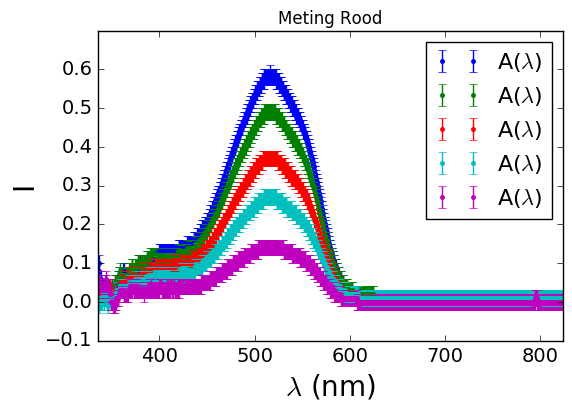

In [19]:
FigVi = plt.figure()
plt.errorbar(Wavelength_R_6, Absorption_R_6, SigmaAbsorptionR, label = 'A($\lambda$)', fmt = '.')
plt.errorbar(Wavelength_R_7, Absorption_R_7, SigmaAbsorptionR, label = 'A($\lambda$)', fmt = '.')
plt.errorbar(Wavelength_R_8, Absorption_R_8, SigmaAbsorptionR, label = 'A($\lambda$)', fmt = '.')
plt.errorbar(Wavelength_R_9, Absorption_R_9, SigmaAbsorptionR, label = 'A($\lambda$)', fmt = '.')
plt.errorbar(Wavelength_R_10, Absorption_R_10, SigmaAbsorptionR, label = 'A($\lambda$)', fmt = '.')

plt.ylabel('I', size=20)
plt.xlabel('$\lambda$ (nm)', size=20)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title("Meting Rood")
plt.axis([Wavelength_V.min()-1, Wavelength_V.max()+1, -0.1, 0.7])

plt.show()

In [20]:
i6 = np.argmax(Absorption_R_6)
i7 = np.argmax(Absorption_R_7)
i8 = np.argmax(Absorption_R_8)
i9 = np.argmax(Absorption_R_9)
i10 = np.argmax(Absorption_R_10)
iR0 = (i6+i7+i8+i9+i10)/5
print(iR0)
print(Wavelength_R_6[374],Wavelength_R_7[374],Wavelength_R_8[374],Wavelength_R_9[374],Wavelength_R_10[374])
LambdaMaxR = Wavelength_R_6[374]

373.6
509.874 509.874 509.874 509.874 509.874


In [21]:
#Geel
DataGeel = pd.read_csv("GeelMeting.txt", sep = "\t", header = None)
Wavelength_G_12 = np.array(DataGeel[0])
Absorption_G_12 = np.array(DataGeel[1])
Wavelength_G_11 = np.array(DataGeel[2])
Absorption_G_11 = np.array(DataGeel[3])
Wavelength_G_14 = np.array(DataGeel[4])
Absorption_G_14 = np.array(DataGeel[5])
Wavelength_G_13 = np.array(DataGeel[6])
Absorption_G_13 = np.array(DataGeel[7])
Wavelength_G_15 = np.array(DataGeel[8])
Absorption_G_15 = np.array(DataGeel[9])

N_G = len(Wavelength_G_11)
SigmaAbsorptionG = [0.02]*N_G

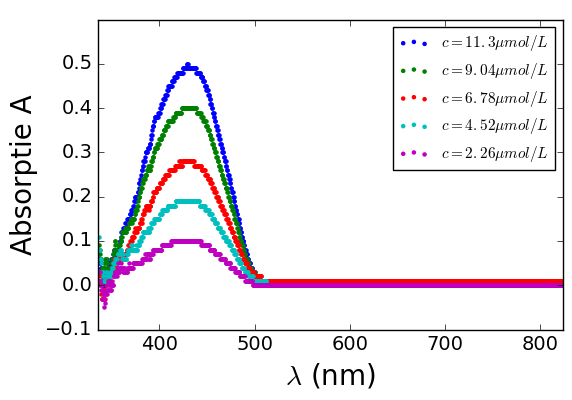

In [22]:
FigVi = plt.figure()
#plt.errorbar(Wavelength_G_11, Absorption_G_11, SigmaAbsorptionG, label = 'A($\lambda$)', fmt = '.')
#plt.errorbar(Wavelength_G_12, Absorption_G_12, SigmaAbsorptionG, label = 'A($\lambda$)', fmt = '.')
#plt.errorbar(Wavelength_G_13, Absorption_G_13, SigmaAbsorptionG, label = 'A($\lambda$)', fmt = '.')
#plt.errorbar(Wavelength_G_14, Absorption_G_14, SigmaAbsorptionG, label = 'A($\lambda$)', fmt = '.')
#plt.errorbar(Wavelength_G_15, Absorption_G_15, SigmaAbsorptionG, label = 'A($\lambda$)', fmt = '.')

plt.scatter(Wavelength_G_11, Absorption_G_11, label = '$c = 11.3 \mu mol/L$', marker = '.', color = "b")
plt.scatter(Wavelength_G_12, Absorption_G_12, label = '$c = 9.04 \mu mol/L$', marker = '.', color = "g")
plt.scatter(Wavelength_G_13, Absorption_G_13, label = '$c = 6.78 \mu mol/L$', marker = '.', color = "r")
plt.scatter(Wavelength_G_14, Absorption_G_14, label = '$c = 4.52 \mu mol/L$', marker = '.', color = "c")
plt.scatter(Wavelength_G_15, Absorption_G_15, label = '$c = 2.26 \mu mol/L$', marker = '.', color = "m")

plt.ylabel('Absorptie A', size=20)
plt.xlabel('$\lambda$ (nm)', size=20)
plt.legend(fontsize=11)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title("Meting Geel")
plt.axis([Wavelength_V.min()-1, Wavelength_V.max()+1, -0.1, 0.6])
#FigVi.savefig('SpectrumGeel.png', dpi=400, bbox_inches='tight')
plt.show()

In [23]:
i11 = np.argmax(Absorption_G_11)
i12 = np.argmax(Absorption_G_12)
i13 = np.argmax(Absorption_G_13)
i14 = np.argmax(Absorption_G_14)
i15 = np.argmax(Absorption_G_15)
iG0 = (i11+i12+i13+i14+i15)/5
print(iG0)
print(Wavelength_G_11[183],Wavelength_G_12[183],Wavelength_G_13[183],Wavelength_G_14[183],Wavelength_G_15[183])
LambdaMaxG = Wavelength_G_11[183]

182.8
420.564 420.564 420.564 420.564 420.564


In [24]:
#Mystery
DataMystery = pd.read_csv("MysteryMeting.txt", sep = "\t", header = None)
Wavelength_M_O = np.array(DataMystery[2])
Absorption_M_O = np.array(DataMystery[3])
Wavelength_M_B = np.array(DataMystery[4])
Absorption_M_B = np.array(DataMystery[5])

N_M = len(Wavelength_M_O)
SigmaAbsorptionM = [0.02]*N_M

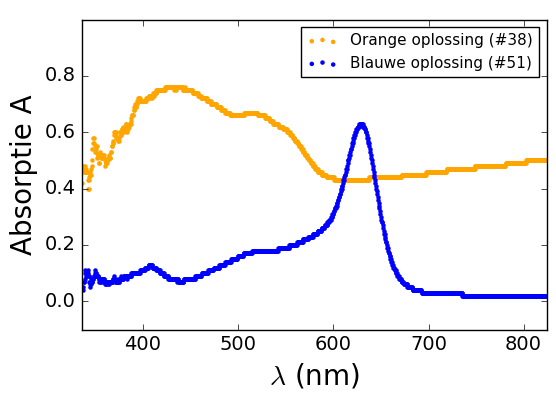

In [25]:
FigVi = plt.figure()
plt.scatter(Wavelength_M_O, Absorption_M_O, label = 'Orange oplossing (#38)', marker = '.', color = "orange")
plt.scatter(Wavelength_M_B, Absorption_M_B, label = 'Blauwe oplossing (#51)', marker = '.', color = "blue")

plt.ylabel('Absorptie A', size=20)
plt.xlabel('$\lambda$ (nm)', size=20)
plt.legend(fontsize=11)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title("Meting Mystery")
plt.axis([Wavelength_V.min()-1, Wavelength_V.max()+1, -0.1, 1])
#FigVi.savefig('MysterySpectra.png', dpi=400, bbox_inches='tight')
plt.show()

In [26]:
iMO = np.argmax(Absorption_M_O)
LambdaMaxMO = Wavelength_M_O[188]
iMB = np.argmax(Absorption_M_B)
LambdaMaxMB = Wavelength_M_B[621]

A_M_O = np.array([Absorption_M_O.max()])
A_M_B = np.array([Absorption_M_B.max()])
print(A_M_O, A_M_B)
print(LambdaMaxB, LambdaMaxR, LambdaMaxG, LambdaMaxMO, LambdaMaxMB)
print("Mystery Blauw met blauw en Mystery orange met Geel")

[0.76] [0.63]
627.319 509.874 420.564 422.885 627.319
Mystery Blauw met blauw en Mystery orange met Geel


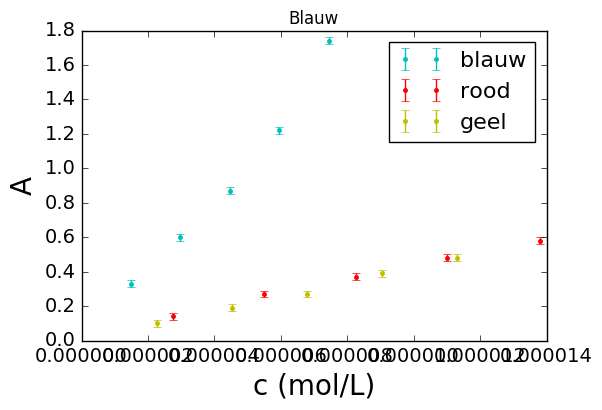

In [27]:
c_B = np.array([7.44*10**-6, 5.95*10**-6, 4.46*10**-6, 2.98*10**-6, 1.49*10**-6])
A_B = np.array([Absorption_B_1[621], Absorption_B_2[621],Absorption_B_3[621],Absorption_B_4[621],Absorption_B_5[621]])
c_R = np.array([1.38*10**-5, 1.10*10**-5, 8.26*10**-6, 5.50*10**-6, 2.75*10**-6])
A_R = np.array([Absorption_R_6[374], Absorption_R_7[374], Absorption_R_8[374], Absorption_R_9[374], Absorption_R_10[374]])
c_G = np.array([1.13*10**-5, 9.04*10**-6, 6.78*10**-6, 4.52*10**-6, 2.26*10**-6])
A_G = np.array([Absorption_G_11[183], Absorption_G_12[183], Absorption_G_13[183], Absorption_G_14[183], Absorption_G_15[183]])
S = np.array([0.02, 0.02, 0.02, 0.02, 0.02])
FigVi = plt.figure()
plt.errorbar(c_B, A_B, S, fmt = "c.", label = "blauw")
plt.errorbar(c_R, A_R, S, fmt = "r.", label = "rood")
plt.errorbar(c_G, A_G, S, fmt = "y.", label = "geel")
plt.ylabel('A', size=20)
plt.xlabel('c (mol/L)', size=20)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title("Blauw")


plt.show()

In [28]:
def modelA(c, e, l):
    return e*c*l

def chi2(x,y,param,s):
    diff = y - modelA(x,param[0], param[1])
    return np.sum((diff/s)**2)

In [29]:
print(A_R/c_R)

[42028.98550725 43636.36363636 44794.18886199 49090.90909091
 50909.09090909]


In [30]:
chi2ftieB = lambda param: chi2(c_B, A_B, param, S)
chi2ftieR = lambda param: chi2(c_R, A_R, param, S)
chi2ftieG = lambda param: chi2(c_G, A_G, param, S)
x0 = [0,1]

result = opt.minimize(chi2ftieB,x0)
eB,lB = result.x
print(eB,lB)
result = opt.minimize(chi2ftieR,x0)
eR,lR = result.x
print(eR,lR)
result = opt.minimize(chi2ftieG,x0)
eG,lG = result.x
print(eG,lG)


138700.8098585328 1.5612702704122623
27341.81624508303 1.5953338281486653
26443.698476169757 1.5972246657213183


In [31]:
f = lambda Eb: chi2(c_B, A_B, [Eb,lB], S) - chi2(c_B, A_B, [eB,lB], S) - 1
Eb1 = opt.fsolve(f,0)[0]
Eb2 = opt.fsolve(f,200000)[0]
sEb1 = eB-Eb1
sEb2 = Eb2-eB
print(Eb1,eB,Eb2)
print(sEb1,sEb2)
print(sEb1/eB,sEb2/eB)
print("-----")
f = lambda Lb: chi2(c_B, A_B, [eB,Lb], S) - chi2(c_B, A_B, [eB,lB], S) - 1
Lb1 = opt.fsolve(f,0)[0]
Lb2 = opt.fsolve(f,200000)[0]
sLb1 = lB-Lb1
sLb2 = Lb2-lB
print(Lb1,lB,Lb2)
print(sLb1,sLb2)
print(sLb1/lB,sLb2/lB)
print("-----")
print("-----")
f = lambda Er: chi2(c_R, A_R, [Er,lR], S) - chi2(c_R, A_R, [eR,lR], S) - 1
Er1 = opt.fsolve(f,0)[0]
Er2 = opt.fsolve(f,200000)[0]
sEr1 = eR-Er1
sEr2 = Er2-eR
print(Er1,eR,Er2)
print(sEr1,sEr2)
print(sEr1/eR,sEr2/eR)
print("-----")
f = lambda Lr: chi2(c_R, A_R, [eR,Lr], S) - chi2(c_R, A_R, [eR,lR], S) - 1
Lr1 = opt.fsolve(f,0)[0]
Lr2 = opt.fsolve(f,200000)[0]
sLr1 = lR-Lr1
sLr2 = Lr2-lR
print(Lr1,lR,Lr2)
print(sLr1,sLr2)
print(sLr1/lR,sLr2/lR)
print("-----")
print("-----")
f = lambda Eg: chi2(c_G, A_G, [Eg,lG], S) - chi2(c_G, A_G, [eG,lG], S) - 1
Eg1 = opt.fsolve(f,0)[0]
Eg2 = opt.fsolve(f,200000)[0]
sEg1 = eG-Eg1
sEg2 = Eg2-eG
print(Eg1,eG,Eg2)
print(sEg1,sEg2)
print(sEg1/eG,sEg2/eG)
print("-----")
f = lambda Lg: chi2(c_G, A_G, [eG,Lg], S) - chi2(c_G, A_G, [eG,lG], S) - 1
Lg1 = opt.fsolve(f,0)[0]
Lg2 = opt.fsolve(f,200000)[0]
sLg1 = lG-Lg1
sLg2 = Lg2-lG
print(Lg1,lG,Lg2)
print(sLg1,sLg2)
print(sLg1/lG,sLg2/lG)

137539.81000974422 138700.8098585328 139861.7480518098
1160.999848788575 1160.9381932769902
0.008370534029128822 0.008370089507487976
-----
1.5482016044851095 1.5612702704122623 1.5743382423209926
0.013068665927152834 0.013067971908730325
0.008370534029128716 0.008370089507487804
-----
-----
26728.251454681154 27341.81624508303 27955.381324977112
613.564790401877 613.5650798940806
0.022440527904294447 0.02244053849218667
-----
1.5595336948614305 1.5953338281486653 1.6311339783271144
0.03580013328723486 0.035800150178449064
0.022440527904294356 0.022440538492181295
-----
-----
25696.604444817935 26443.698476169757 27190.788849141114
747.0940313518222 747.0903729713573
0.02825225193159271 0.0282521135855717
-----
1.5520994720740056 1.5972246657213183 1.6423496383989902
0.04512519364731271 0.045124972677671904
0.028252251931592757 0.02825211358559451


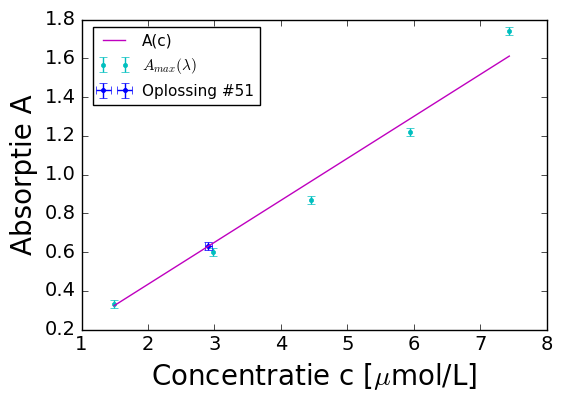

In [32]:
SmoothC_B = np.linspace(c_B.min(), c_B.max(), 100)
FigVi = plt.figure()
plt.errorbar(c_B, A_B, S, fmt = "c.", label = "$A_{max}(\lambda)$")
plt.errorbar([2.910*10**-6], [0.63], [0.02], [0.05 * 10**-6], fmt = ".", label = "Oplossing #51")
plt.ylabel('Absorptie A', size=20)
plt.xlabel('Concentratie c [$\mu$mol/L]', size=20)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title("Blauw")
plt.plot(SmoothC_B, modelA(SmoothC_B, eB, lB), "m", label = 'A(c)')
plt.xticks([1*10**-6,2*10**-6,3*10**-6,4*10**-6,5*10**-6,6*10**-6, 7*10**-6,8*10**-6], [1,2,3,4,5,6,7,8])
plt.legend(bbox_to_anchor=(0.4, 1),fontsize=11)
#FigVi.savefig('BLAUW.png', dpi=400, bbox_inches='tight')
plt.show()

In [33]:
v = len(c_B) - len([eB,lB])
pwaarde = 1 - stat.chi2.cdf(chi2ftieB([eB,lB]), v)
print(str(pwaarde*100)+"%")

0.0%


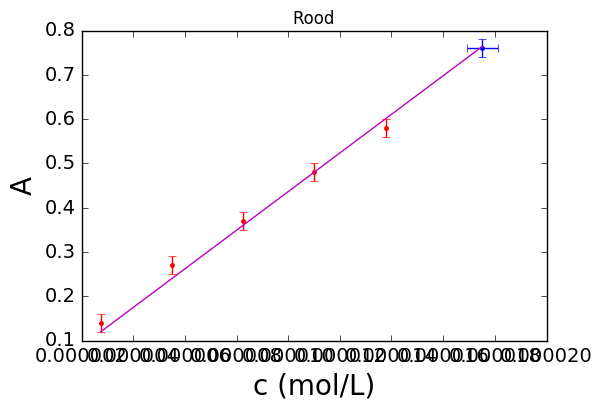

In [34]:
SmoothC_R = np.linspace(c_R.min(), 1.751*10**-5, 100) #c_R.max()

FigVi = plt.figure()
plt.errorbar(c_R, A_R, S, fmt = "r.", label = "rood")
plt.errorbar([1.751*10**-5],[0.76], [ 0.02],[ 0.06*10**-5], fmt = '.'  )
plt.ylabel('A', size=20)
plt.xlabel('c (mol/L)', size=20)
#plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title("Rood")
plt.plot(SmoothC_R, modelA(SmoothC_R, eR, lR), "m")

plt.show()

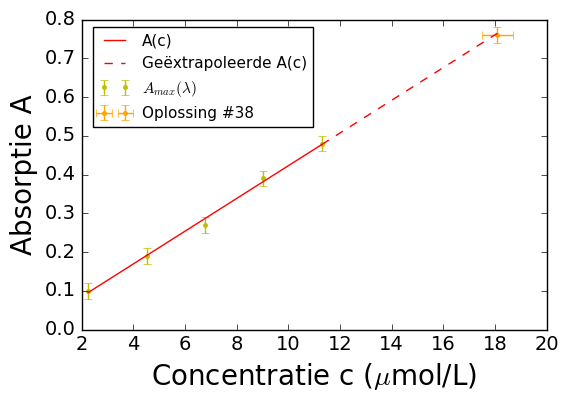

In [35]:
SmoothC_G = np.linspace(c_G.min(),c_G.max() , 100) #1.810*10**-5
Extrapolatie = np.linspace(c_G.max(),1.810*10**-5,100)

FigVi = plt.figure()
plt.errorbar(c_G, A_G, S, fmt = "y.", label = "$A_{max}(\lambda)$")
plt.errorbar([1.810*10**-5], [0.76], [0.02], [0.06*10**-5], fmt = ".", color = "orange", label = "Oplossing #38")
plt.ylabel('Absorptie A', size=20)
plt.xlabel('Concentratie c ($\mu$mol/L)', size=20)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title("Geel")
plt.plot(SmoothC_G, modelA(SmoothC_G, eG, lG), "r", label = 'A(c)')
plt.plot(Extrapolatie, modelA(Extrapolatie, eG, lG), "r--", label = 'Geëxtrapoleerde A(c)')
plt.legend(bbox_to_anchor=(0.515, 1),fontsize=11)
plt.xticks([2*10**-6,4*10**-6,6*10**-6, 8*10**-6,1*10**-5,1.2*10**-5,1.4*10**-5,1.6*10**-5,
           1.8*10**-5,2*10**-5,], [2,4,6,8,10,12,14,16,18,20])
#FigVi.savefig('GEEL.png', dpi=400, bbox_inches='tight')
plt.show()

In [36]:
v = len(c_G) - len([eG,lG])
pwaarde = 1 - stat.chi2.cdf(chi2ftieG([eG,lG]), v)
print(str(pwaarde*100)+"%")

82.32334276124237%


In [37]:
def Sc(A,e,c,Sa, Se):
    return np.sqrt( (e*c)**-2 * Sa**2 + (A / (c*e**2))**2 * Se**2)

print(Sc(0.76, 26.4*10**3, 1.810 * 10 ** -5, 0.02, 0.7*10**3))

print(Sc(0.63, 13.87*10**4, 2.910 * 10 ** -6, 0.02, 0.12*10**4))

print(Sc(0.76, 27.3*10**3, 1.751 * 10 ** -5, 0.02, 0.6*10**3))

0.05941656366953804
0.05135915454670506
0.054511248953985424
